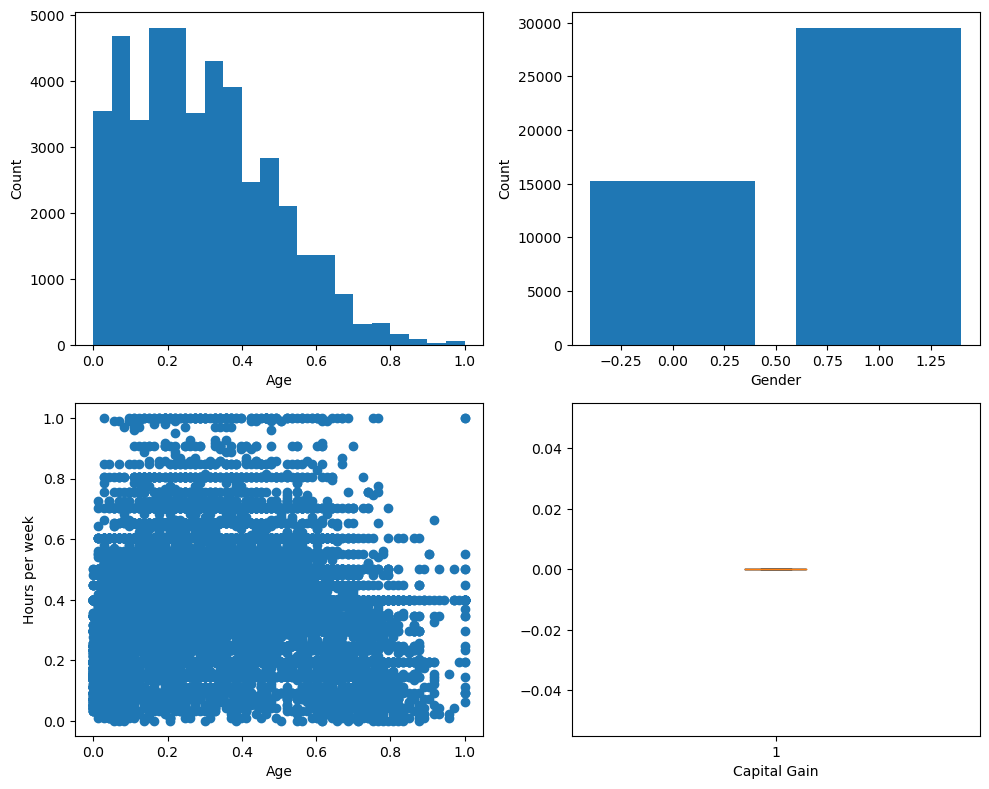

Accuracy: 0.7892583500706688
Precision: 0.4879931389365352
Recall: 0.6209530738450345
F1-score: 0.5465023211141348


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
df = pd.read_csv('adult.csv')

# Drop missing values
df = df.dropna()

# Remove outliers in capital-gain column
q1 = df['capital-gain'].quantile(0.25)
q3 = df['capital-gain'].quantile(0.75)
iqr = q3 - q1
df = df[(df['capital-gain'] >= q1 - 1.5*iqr) & (df['capital-gain'] <= q3 + 1.5*iqr)]

# Select relevant features
relevant_features = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = df[relevant_features]

# Preprocess the data
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Scale numerical variables using min-max scaling
scaler = MinMaxScaler()
numerical_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the dataset into training and testing sets
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].hist(df['age'], bins=20)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')
axs[0, 1].bar(df['gender'].unique(), df['gender'].value_counts())
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Count')
axs[1, 0].scatter(df['age'], df['hours-per-week'])
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Hours per week')
axs[1, 1].boxplot(df['capital-gain'])
axs[1, 1].set_xlabel('Capital Gain')
plt.tight_layout()
plt.show()

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred,pos_label='>50K'))
print('Recall:', recall_score(y_test, y_pred,pos_label='>50K'))
print('F1-score:', f1_score(y_test, y_pred,pos_label='>50K'))
